### Objective : Predict the percentage of an student based on the no. of study hours

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data

In [9]:
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis

## Shape of the dataset

In [10]:
df.shape

(25, 2)

## Size of the dataset

In [11]:
df.size

50

## First Five rows

In [12]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Last Five rows

In [14]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Datatypes of columns

In [15]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

## Checking for null values

In [16]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Checking for duplicate values in data

In [17]:
df.duplicated().sum()

0

## Statistics of the data

In [21]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Correlation of dataset

In [22]:
corr = df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Information of dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Regploat 

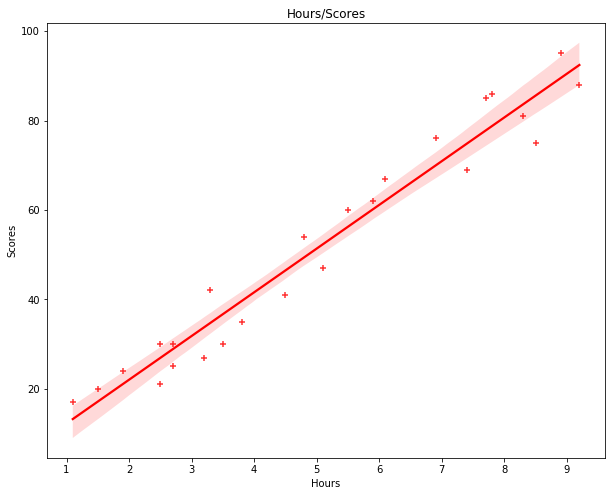

In [19]:
plt.figure(figsize=(10,8))
x = df['Hours']
y = df['Scores']

sns.regplot(x,y,marker='+',color='r')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours/Scores')
plt.show()

## Splitting of dependent and independent features

In [24]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Splitting train and test data

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
xtrain, xtest , ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
xtest.size

8

In [28]:
xtrain.size

17

In [29]:
xtest.shape

(8, 1)

In [30]:
xtrain.shape

(17, 1)

## Creating and fitting the linear regression model

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
reg_model = LinearRegression()
reg_model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Checking for the intercept (it is a point on y axis where slope of line is passing)

In [34]:
reg_model.intercept_

2.370815382341881

### Checking for the slope value(it is a steepness of the line)

In [35]:
reg_model.coef_

array([9.78856669])

### Checking for the data accurecy

In [36]:
reg_model.score(xtrain,ytrain)

0.9484997422695115

### Predicted valu by model

In [38]:
y_pred = reg_model.predict(xtest)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

## Creating a dataframe for actual and predicted values

In [43]:
new_df = pd.DataFrame({'Actual':ytest,'Predicted':y_pred})
new_df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Creating a combine plot (train data, test data, regression line)

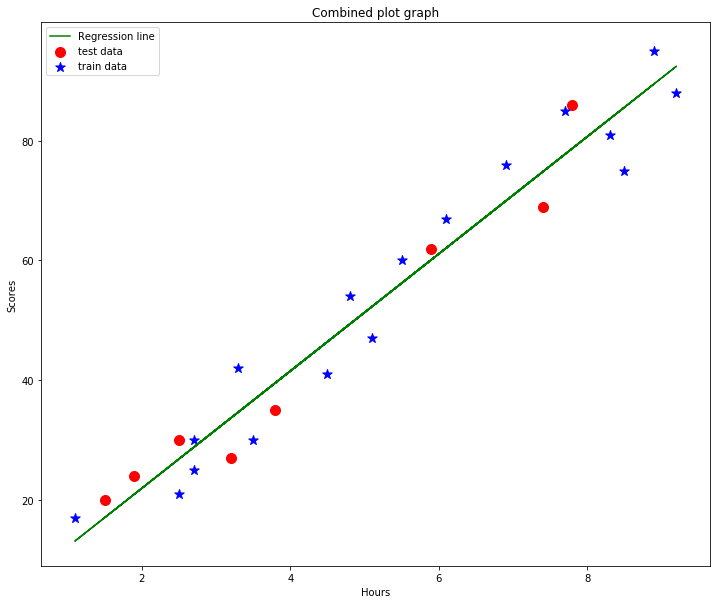

In [47]:
plt.figure(figsize=(12,10))
plt.scatter(xtest,ytest,color='red',label='test data',s=100)
plt.scatter(xtrain,ytrain,color='blue',marker='*',label='train data',s=100)
plt.plot(x,reg_model.predict(x),color='green',label='Regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Combined plot graph')
plt.legend()
plt.show()

# Model Evaluation

## R2 Score (Coefficient of determination)

In [48]:
reg_model.score(xtest,ytest)

0.9568211104435257

## Mean absolute error

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,ytest)

4.419727808027652

## Mean squared error

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,ytest)

22.96509721270043

## Root mean squared error

mean_squared_error(y_pred,ytest,squared=False)

## Mean squared log error

In [57]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred,ytest)

0.015777062076746614

### Question : What will be predicted score if a student studies for 9.25 hrs/ day?

## Predicting Score for 9.25 hrs/ day?

In [58]:
reg_model.predict([[9.25]])

array([92.91505723])